# コード3-2：各種回帰モデルの実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

一般化線形モデルの実装の例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み

In [49]:
## 必要があればインストール
# !pip3 install matplotlib numpy scipy statsmodels

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
import statsmodels.api as sm
import collections

## 一般化線形モデル

数学コラム０２で言及された一般化線形モデルのうち以下の実装を紹介する。

- ポアソン回帰
- 正規分布に基づく回帰
- 負の二項分布に基づく回帰（未）

これらの実装の詳しい説明は各パッケージのdocumentationに詳しい。

- Introduction — statsmodels  
  https://www.statsmodels.org/stable/index.html
- scikit-learn: machine learning in Python — scikit-learn 1.2.1 documentation  
  https://scikit-learn.org/stable/index.html

## ポアソン回帰



データ$y_i$、説明変数$x_i={0, 1,..., 99, 100}$で、誤差構造を

$$
P(y_i = k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

と考える。正規分布の母数$\lambda$について線形予測子を用いて

$$
\psi \left( \lambda \right) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

と表し、リンク関数$\psi$を対数関数とすることで、回帰を行う。

In [51]:
nobs1 = 100 ## データの数
x = np.arange(nobs1) ## 説明変数
np.random.seed(54321) ## 乱数のシード値
X = np.column_stack((x,x**2))
X = sm.add_constant(X, prepend=False) ## 線形予測子（説明変数 + 定数）のもと
lny = np.random.poisson(lam=np.exp(-(.03*x + .0001*x**2 - 1.0)), size=nobs1) ## 真のデータに 0 - 0.1の乱数を加える

In [52]:
lny.size

100

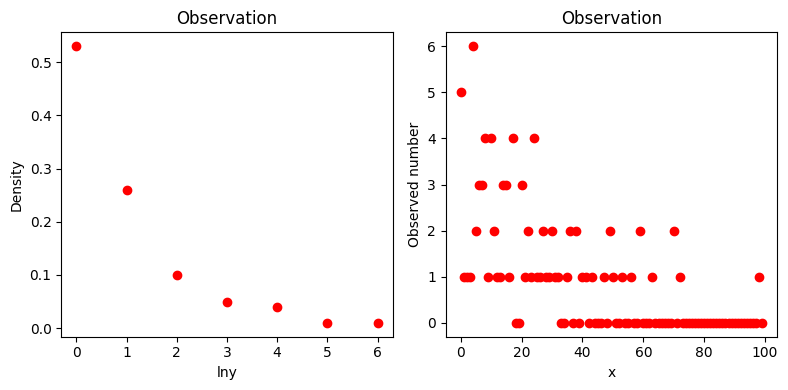

In [53]:
## データのプロット

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(collections.Counter(lny).keys(), [x/lny.size for x in collections.Counter(lny).values()], marker = "o", linestyle = "none", color = "red")
ax1.set_title("Observation")
plt.xlabel("lny")
plt.ylabel("Density")

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, lny, marker = "o", linestyle = "none", color = "red")
ax2.set_title("Observation")
plt.xlabel("x")
plt.ylabel("Observed number")


fig.tight_layout()
fig.show()

In [54]:
## 誤差構造：ポアソン分布 / リンク関数：対数 / 線形予測子：beta_0 + beta_1*x^2 + beta_2*x^2
poisson_log = sm.GLM(lny, X, family=sm.families.Poisson(sm.families.links.log()))
poisson_log_results = poisson_log.fit()
print(poisson_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.427
Date:                Mon, 27 Feb 2023   Deviance:                       81.557
Time:                        19:26:42   Pearson chi2:                     104.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5665
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0288      0.015     -1.864      0.0

In [55]:
estpars = poisson_log_results.params

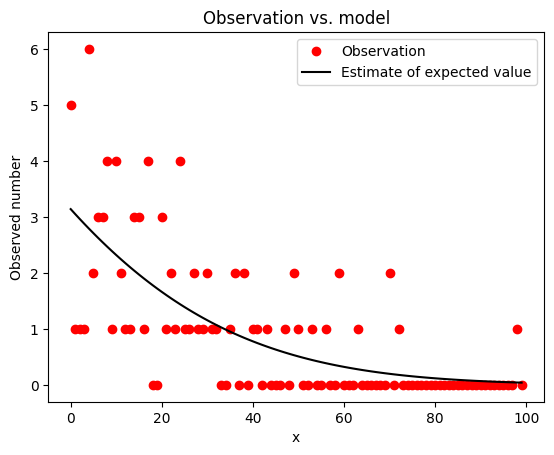

In [56]:
## 結果のプロット

plt.plot(x, lny, marker = "o", linestyle = "none", color = "red", label = "Observation")
plt.plot(x, np.exp(estpars[0]*x + estpars[1]*x**2 + estpars[2]), color = "black", label = "Estimate of expected value")
plt.title("Observation vs. model")
plt.xlabel("x")
plt.ylabel("Observed number")
plt.legend()

plt.show()

## 正規分布に基づく回帰

データ$y_i$、説明変数$x_i={0, 1,..., 99, 100}$で、誤差構造を

$$
P(y_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( - \frac{(y_i - \mu)^2}{2\sigma^2} \right)
$$

と考える。正規分布の平均$\mu$について線形予測子を用いて

$$
\psi \left( \mu \right) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

と表し、リンク関数$\psi$を対数関数とすることで、回帰を行う。

In [64]:
## 擬似データを生成
## from https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html

nobs2 = 100 ## データの数
x = np.arange(nobs2) ## 説明変数
np.random.seed(54321) ## 乱数のシード値
X = np.column_stack((x,x**2))
X = sm.add_constant(X, prepend=False) ## 線形予測子（説明変数 + 定数）のもと
lny = np.exp(-(.03*x + .0001*x**2 - 1.0)) + .1 * np.random.normal(scale = 1.5, size = nobs2) ## 真のデータに 0 - 0.1の乱数を加える

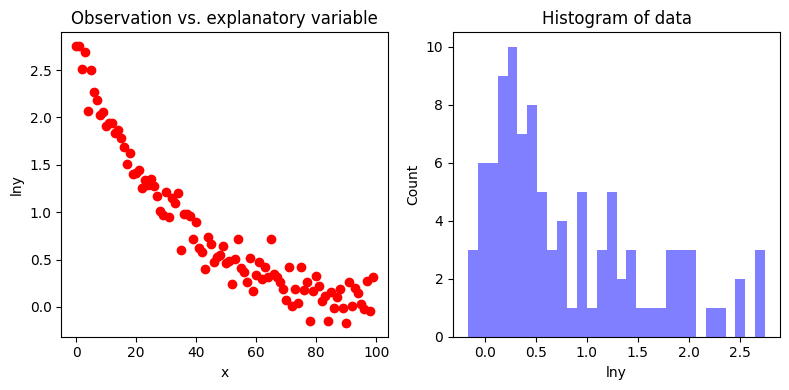

In [65]:
## データをプロット

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X[:,0], lny, marker = "o", linestyle = "none", color = "red")
ax1.set_title("Observation vs. explanatory variable")
plt.xlabel("x")
plt.ylabel("lny")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(lny, 30, facecolor='blue', alpha=0.5)
ax2.set_title("Histogram of data")
plt.xlabel("lny")
plt.ylabel("Count")

fig.tight_layout()
fig.show()

In [66]:
## 誤差構造：ガウス分布（正規分布） / リンク関数：対数 / 線形予測子：beta_0 + beta_1*x^2 + beta_2*x^2
gauss_log = sm.GLM(lny, X, family=sm.families.Gaussian(sm.families.links.log()))
gauss_log_results = gauss_log.fit()
print(gauss_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                        0.020149
Method:                          IRLS   Log-Likelihood:                 54.836
Date:                Mon, 27 Feb 2023   Deviance:                       1.9544
Time:                        19:28:37   Pearson chi2:                     1.95
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0288      0.002    -12.512      0.0

In [67]:
## https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html
estpars = gauss_log_results.params

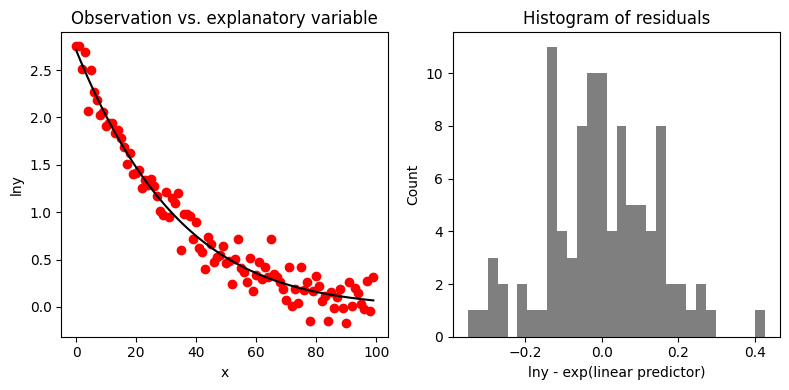

In [68]:
## 結果のプロット

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X[:,0], lny, marker = "o", linestyle = "none", color = "red")
ax1.plot(X[:,0], np.exp(estpars[0]*x + estpars[1]*x**2 + estpars[2]), color = "black")
ax1.set_title("Observation vs. explanatory variable")
plt.xlabel("x")
plt.ylabel("lny")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(lny - np.exp(estpars[0]*x + estpars[1]*x**2 + estpars[2]), 30, facecolor='black', alpha=0.5)
ax2.set_title("Histogram of residuals")
plt.xlabel("lny - exp(linear predictor)")
plt.ylabel("Count")

fig.tight_layout()
fig.show()

## 負の二項分布に基づく回帰（追記予定）

データ$y_i$、説明変数$x_i={0, 1,..., 99, 100}$で、誤差構造を

$$
P(y_i = k | r, p) = \begin{pmatrix} k + r - 1 \\ r - 1 \end{pmatrix} (1-p)^r p^k 
$$

と考える。ここで期待値は

$$
E[y_i]=\frac{rp}{1-p}
$$

分散は

$$
Var[y_i] = \frac{rp}{(1-p)^2}
$$

と表され、新規のパラメータ$\alpha$を用いて

$$
Var[y_i] = (1 + \alpha)E[y_i]
$$

と表すこととする。

正規分布の母数$\lambda$について線形予測子を用いて

$$
\psi \left( \lambda \right) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

と表し、リンク関数$\psi$を対数関数とすることで、回帰を行う。